In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/ColabNotebooks/Data/MTech_Data/Exp6_Myo5_20200221/"
fingers= ['1_fingerspread','2_doubletap','3_wavein', '4_waveout','5_fist']

In [ ]:
import glob
import sys
import pandas
minlen = sys.maxsize
#print(minlen)
for exp in fingers :
    files = glob.glob(path + exp + '/emg*.csv')    
    #print(files)    
    for file in files:
        emgData = pandas.read_csv(file)
        namepos = file.index('-')
        name = file[namepos:]
        if (minlen > len(emgData[emgData.columns[0]])):
          minlen = len(emgData[emgData.columns[0]])
print(minlen)

In [ ]:
factoredminlen = 2000
factoredminlen

In [ ]:
print(files)

Raw Emg
200


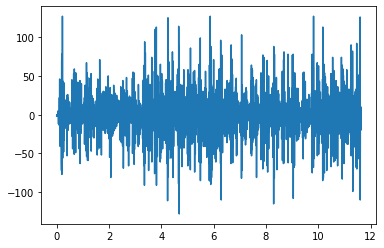

In [ ]:
import math
import pandas
import numpy as np
import matplotlib.pyplot as plt

input_cols = ['Mean', 'Standard Deviation','Skewness', 'Kurtosis', 'Standard Error',
              'Mean Frequency','Median Frequency']

emgData = pandas.read_csv(files[1])
for data in emgData.columns:
  if not 'emg8' in data:
    continue
  complete_emg = emgData[data]

print("Raw Emg")
emg_frame = complete_emg
sampling_rate=200
print(sampling_rate)
time = np.array([i/sampling_rate for i in range(0, len(emg_frame), 1)])
plt.plot(time, emg_frame)
plt.show()


512
Complete PSD


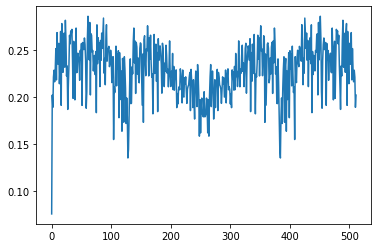

First half PSD


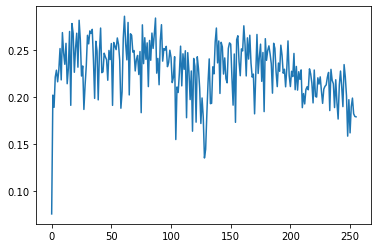

Half 256


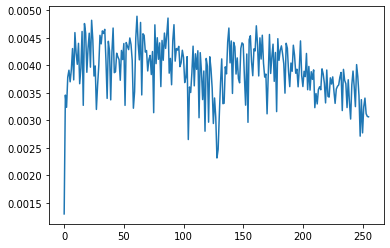

0.9999999999999999


In [ ]:

n= 512 #2048 #4096
sampling_rate = 200
#i/sampling_rate = (i/len(emg_frame))*(len(emg_frame)/sampling_rate)[time varies from 1/200 to 1]
abs_fft = np.absolute(np.fft.fft(emg_frame, n=n))

#spectrum has large dynamic range. lot of details in lower power spectral will be lost. 
#to make sure dynamic range is properly maintained 20 (since psd is square rooted) *log 
log_abs_fft = np.log(abs_fft)
shift_fft = np.fft.fftshift(log_abs_fft)

psd = (1/n)*20*shift_fft
print(len(psd))
psd_x = np.array([i for i in range (0, n, 1)])
print("Complete PSD")
plt.plot(psd_x, psd)
plt.show()
print("First half PSD")
plt.plot(psd_x[0:(int)(n/2)], psd[0:(int)(n/2)])
#plt.psd(psd)
plt.show()

psd_half = psd[0:(int)(n/2)]
print("Half {}".format(len(psd_half)))
#Mean frequency sum(P)/M      
sumofpsd = np.sum(psd_half)    
psd_half_pdf = psd_half/sumofpsd
sumofpdf = np.sum(psd_half_pdf)
plt.plot(psd_x[0:len(psd_half)], psd_half_pdf)
plt.show()
print(sumofpdf)

# sample spacing
#T = 1.0 / n
#x = np.linspace(0.0, n*T, n)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
#yf = scipy.fftpack.fft(y)
#xf = np.linspace(0.0, 1.0/(2.0*T), n//2)

#fig, ax = plt.subplots()
#ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
#plt.show()



In [ ]:

arr_i = [i for i in range(0, len(psd_half),1)]
e_i = psd_half_pdf
e_sum = 0
for t in range (0,len(psd_half),1):
  e_sum = e_sum + e_i[t]*arr_i[t]

meanfreq_idx = e_sum#/len(psd_half)
meanfreq = (meanfreq_idx*100)/len(psd_half)
print("MeanFreq {} {} {}".format(meanfreq_idx, len(psd_half), meanfreq))

#Median Frequency 
e_sum = 0
e_half = 1/2
global_t =0
for t in range (0,len(psd_half),1):
  e_sum = e_sum + e_i[t]
  if e_sum >= e_half:
    global_t = t
    print(global_t)
    break

medfreq_idx = global_t-1
medfreq = (medfreq_idx*100)/len(psd_half)
print("MedFreq {}".format(medfreq))

MeanFreq 124.51421005331393 256 48.63836330207575
123
MedFreq 47.65625


In [ ]:
import glob
import sys
import pandas
minlen = sys.maxsize
for exp in fingers :
    #files = glob.glob(path + exp + '/emg*.csv')
    files = glob.glob(path + exp + '/emg*.csv')    
    #print(files)    
    for file in files:
        emgData = pandas.read_csv(file)
        namepos = file.index('-')
        name = file[namepos:]
        if (minlen > len(emgData[emgData.columns[0]])):
          minlen = len(emgData[emgData.columns[0]])


In [ ]:
import pandas
import datetime
import os
import math
import glob
import sys
import  numpy as np
from scipy import signal
#from matplotlib.mlab import PCA as mlabPCA
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from statsmodels import robust
from sklearn.metrics import accuracy_score 

In [ ]:
import scipy
#### Refactored Features

from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/ColabNotebooks/Data/MTech_Data/Exp6_Myo5_20200221/"
fingers= ['1_fingerspread','2_doubletap','3_wavein', '4_waveout','5_fist']
import glob
import sys
import pandas
minlen = sys.maxsize
for exp in fingers :
    files = glob.glob(path + exp + '/emg*.csv')    
    #print(files)    
    for file in files:
        emgData = pandas.read_csv(file)
        namepos = file.index('-')
        name = file[namepos:]
        if (minlen > len(emgData[emgData.columns[0]])):
          minlen = len(emgData[emgData.columns[0]])
print(minlen)
factoredminlen = 2000

import math
import pandas
import numpy as np
import matplotlib.pyplot as plt

input_cols = ['Mean', 'Standard Deviation','Skewness', 'Kurtosis', 'Standard Error',
              'Mean Frequency','Median Frequency']
result = []
result.append([])
index =0 
for exp in fingers :
    files = glob.glob(path + exp + '/emg*.csv')
    
    emgData = pandas.read_csv(files[1])
for data in emgData.columns:
  if not 'emg8' in data:
    continue
  complete_emg = emgData[data]
  print("Raw Emg")
  emg_frame = complete_emg#[50:250]

  emg_frame = pandas.to_numeric(emg_frame)
  #mean sum(x)
  mean = np.mean(abs(emg_frame))
  result[index].append(mean)
                
  #Standard Deviation
  std = np.std(emg_frame)
  result[index].append(std)
  
  #Skewness - is by taking the mean of the cubes of differences of each point from the mean
  #and then dividing it by the cube of the standard deviation. 
  
  skew = scipy.stats.skew(emg_frame, axis=0)
  result[index].append(skew)
                
  #Kurtosis
  kurt =scipy.stats.kurtosis(emg_frame,axis=0,fisher=False) 
  result[index].append(kurt)
                
  #standard error 
  sem = scipy.stats.sem(emg_frame)
  result[index].append(sem)

  n= 4096 #512 #2048 #4096
  sampling_rate = 200
  #i/sampling_rate = (i/len(emg_frame))*(len(emg_frame)/sampling_rate)[time varies from 1/200 to 1]
  
  time = np.array([i/sampling_rate for i in range(0, len(emg_frame), 1)])
  #plt.plot(time, emg_frame)
  #plt.show()
  abs_fft = np.absolute(np.fft.fft(emg_frame, n=n))
  
  #spectrum has large dynamic range. lot of details in lower power spectral will be lost. 
  #to make sure dynamic range is properly maintained 20 (since psd is square rooted) *log 
  
  log_abs_fft = np.log(abs_fft)
  shift_fft = np.fft.fftshift(log_abs_fft)
  
  psd = (1/n)*20*shift_fft
  #print(len(psd))
  psd_x = np.array([i for i in range (0, n, 1)])
  #print("Complete PSD")
  #plt.plot(psd_x, psd)
  #plt.show()
  #print("First half PSD")
  #plt.plot(psd_x[0:(int)(n/2)], psd[0:(int)(n/2)])
  #plt.psd(psd)
  #plt.show()
  
  psd_half = psd[0:(int)(n/2)]
  #print("Half {}".format(len(psd_half)))
  
  #Mean frequency sum(P)/M      
  sumofpsd = np.sum(psd_half)    
  psd_half_pdf = psd_half/sumofpsd
  sumofpdf = np.sum(psd_half_pdf)
  #plt.plot(psd_x[0:len(psd_half)], psd_half_pdf)
  #plt.show()
  #print(sumofpdf)
  
  arr_i = [i for i in range(0, len(psd_half),1)]
  e_i = psd_half_pdf
  e_sum = 0
  for t in range (0,len(psd_half),1):
    e_sum = e_sum + e_i[t]*arr_i[t]
	
  meanfreq_idx = e_sum#/len(psd_half)
  meanfreq = (meanfreq_idx*100)/len(psd_half)
  
  e_sum = 0
  e_half = 1/2
  global_t =0
  
  for t in range (0,len(psd_half),1):
     e_sum = e_sum + e_i[t]
     if e_sum >= e_half:
       global_t = t
       break
  medfreq_idx = global_t-1
  medfreq = (medfreq_idx*100)/len(psd_half)
  result[index].append(meanfreq)
  result[index].append(medfreq)

In [ ]:
#['MAV', 'Standard Deviation','Skewness', 'Kurtosis', 'Standard Error',
              #'Mean Frequency','Median Frequency']
result

[[21.073453608247423,
  29.36884330407957,
  0.09769112053399721,
  5.036226937770055,
  0.6088196351104985,
  48.44181211620494,
  47.55859375]]